In [2]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt  #to show color based segmentation / histogram

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

1. Apply histogram equalization on a histogram equalized image. In other words, apply histogram equalization twice on an image. Is there any difference between the first and second output image? You are free to use any image.


In [8]:
img = cv.imread("lena.jfif", 0)

eq = cv.equalizeHist(img)
eq2 = cv.equalizeHist(eq)

cv.imshow("result", np.hstack((img, eq, eq2)))
cv.waitKey(0)
cv.destroyAllWindows

#no difference

<function destroyAllWindows>

2. Load the image 'electronic.jfif'. Then,
- Experiment with different kernel size. Which kernel size is the most appropriate?
- Perform edge detection using Sobel operator (combined both x and y) with and without image smoothing (Gaussian blurring). Display the 2 images.
- Try Laplacian of Gaussian


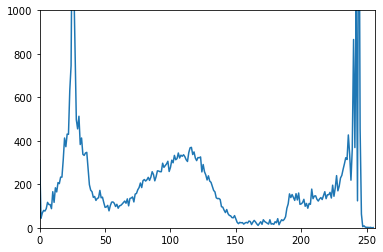

In [9]:
img = cv.imread("electronic.jfif")
#threshold 
hist = cv.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 256])
plt.ylim([0, 1000])
plt.show()


Text(0.5, 1.0, 'KSize = 5')

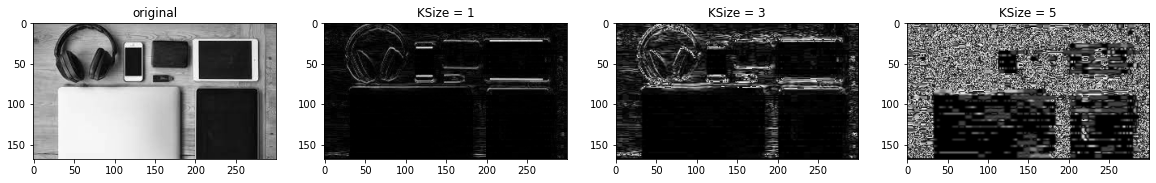

In [4]:
#2A

img = cv.imread("electronic.jfif", 0)

#ksize = 1 has the best output
sobel_64f_1 = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = 1)
sobel_64f_1 = np.uint8(np.absolute(sobel_64f_1))
sobel_64f_1 = cv.convertScaleAbs(sobel_64f_1)

sobel_64f_3 = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = 3)
sobel_64f_3 = np.uint8(np.absolute(sobel_64f_3))
sobel_64f_3 = cv.convertScaleAbs(sobel_64f_3)

sobel_64f_5 = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = 5)
sobel_64f_5 = np.uint8(np.absolute(sobel_64f_5))
sobel_64f_5 = cv.convertScaleAbs(sobel_64f_5)

plt.figure(figsize = (20, 20))
plt.subplot(1, 4, 1)
plt.title("original")
plt.imshow( img, cmap = "gray")
plt.subplot(1, 4, 2)
plt.imshow( sobel_64f_1, cmap = "gray")
plt.title("KSize = 1")
plt.subplot(1, 4, 3)
plt.imshow( sobel_64f_3, cmap = "gray")
plt.title("KSize = 3")
plt.subplot(1, 4, 4)
plt.imshow( sobel_64f_5, cmap = "gray")
plt.title("KSize = 5")

Text(0.5, 1.0, 'With blur')

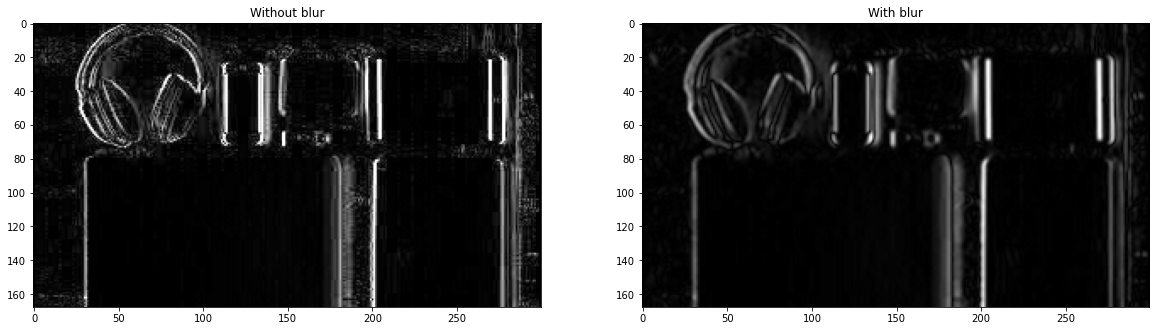

In [16]:
#2B

#Sobel without blur
sobelx = cv.Sobel(img, cv.CV_64F ,1, 0, ksize = 1)
sobely = cv.Sobel(img, cv.CV_64F ,1, 0, ksize = 1)

abs_sobelx_u8 = cv.convertScaleAbs(sobelx)
abs_sobely_u8 = cv.convertScaleAbs(sobely)

map_edge = cv.add(abs_sobelx_u8, abs_sobely_u8)

img_blur = cv.GaussianBlur(img, (5, 5), 0)

#Sobel with blur
sobelx_blur = cv.Sobel(img_blur, cv.CV_64F ,1, 0, ksize = 1)
sobely_blur = cv.Sobel(img_blur, cv.CV_64F ,1, 0, ksize = 1)

abs_sobelx_u8_blur = cv.convertScaleAbs(sobelx_blur)
abs_sobely_u8_blur = cv.convertScaleAbs(sobely_blur)

map_edge_blur = cv.add(abs_sobelx_u8_blur, abs_sobely_u8_blur)


#Output
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1)
plt.imshow( map_edge, cmap = "gray")
plt.title("Without blur")
plt.subplot(1, 2, 2)
plt.imshow( map_edge_blur, cmap = "gray")
plt.title("With blur")



Text(0.5, 1.0, 'Laplacian')

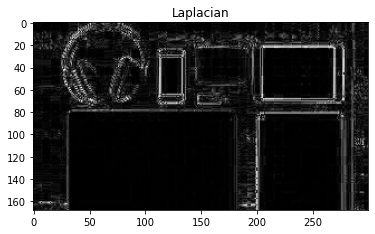

In [5]:
#2C
laplacian = cv.Laplacian(img, cv.CV_64F, ksize = 1)
laplacian_64f = np.uint8(np.absolute(laplacian))


plt.subplot(1, 1, 1)
plt.imshow( laplacian_64f, cmap = "gray")
plt.title("Laplacian")





3. Based on the exercise conducted from (A) - (C), which image processing pathway is optimal? Justify your answer.
Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.


(Text(0.5, 1.0, 'Prewitt'), ([], []), ([], []))

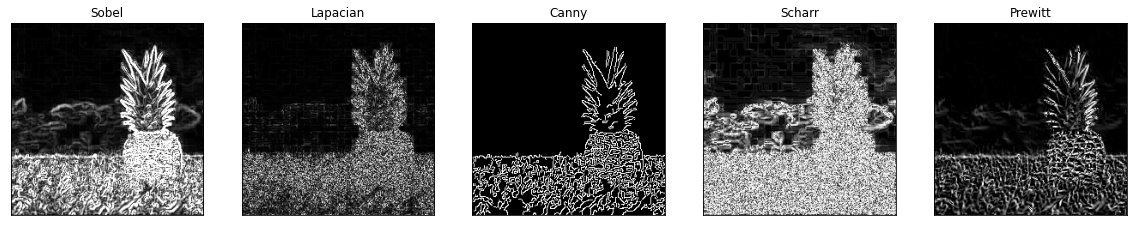

In [21]:
#Q3

img = cv.imread("pineapple.jfif", 0)

#Sobel
sobelx = cv.Sobel(img, cv.CV_64F ,1, 0, ksize = 3)
sobely = cv.Sobel(img, cv.CV_64F , 0, 1, ksize = 3)

abs_sobelx_u8 = cv.convertScaleAbs(sobelx)
abs_sobely_u8 = cv.convertScaleAbs(sobely)

map_edge = cv.add(abs_sobelx_u8, abs_sobely_u8)


#Laplacian
laplacian = cv.Laplacian(img, cv.CV_64F, ksize = 3)
laplacian_64F = np.uint8(np.absolute(laplacian))

#Canny
edges = cv.Canny(img, 100, 300, apertureSize=3, L2gradient = False)

#Scharr
scharr_X = cv.Scharr(img, cv.CV_64F, 1, 0) 
scharr_X_abs = np.uint8(np.absolute(scharr_X)) 
scharr_Y = cv.Scharr(img, cv.CV_64F, 0, 1) 
scharr_Y_abs = np.uint8(np.absolute(scharr_Y)) 

scharr_XY_combined = cv.bitwise_or(scharr_Y_abs,scharr_X_abs) 

#Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img, -1, kernelx)
img_prewitty = cv.filter2D(img, -1, kernely)
prewitt = img_prewittx + img_prewitty

plt.figure(figsize = (20, 20))
plt.subplot(1, 5, 1), plt.imshow(map_edge, cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 5, 2), plt.imshow(laplacian_64F, cmap = 'gray')
plt.title('Lapacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 5, 3), plt.imshow(edges, cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 5, 4), plt.imshow(scharr_XY_combined, cmap = 'gray')
plt.title('Scharr'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 5, 5), plt.imshow(prewitt, cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])

#Canny has the best output
#scharr has the worst

4. Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.

In [114]:
img = cv.imread('electronic.jfif')
img = cv.bilateralFilter(img, 8, 20, 5)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
windowname = "window"
thresh = 182


canny_output = cv.Canny(img_gray, thresh, int(2.5*thresh))

contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#draw contours

img_bgr = cv.imread('electronic.jfif')


x, y, w, h = cv.boundingRect(contours[5])
cv.rectangle(img_bgr, (x,y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA)

cv.imshow(windowname,img_bgr)
cv.waitKey(0)
cv.destroyAllWindows()